# Lab: Drawdown
## Imports

In [1]:
import pandas as pd

## Read data

In [2]:
rets = pd.read_csv(
    "../data/Portfolios_Formed_on_ME_monthly_EW.csv",
    header=0,
    index_col=0,
    na_values=-99.99,
)
rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period("M")
rets = rets[["Lo 10", "Hi 10"]]
rets.columns = ["SmallCap", "LargeCap"]
rets = rets / 100

<Axes: >

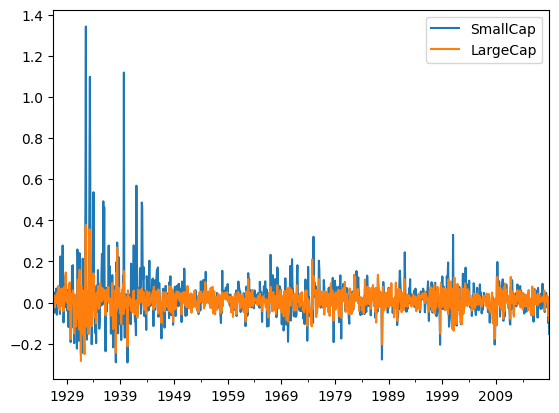

In [3]:
rets.plot.line()

## Compute drawdowns

1. Compute a wealth index
2. Compute the previous peaks
3. Compute drawdown

### Compute a wealth index

In [4]:
wealth_index = 1000 * (1 + rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

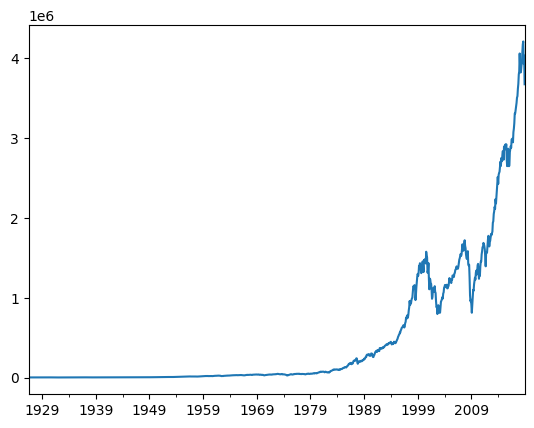

In [5]:
wealth_index.plot.line()

### Compute the previous peaks

In [6]:
previous_peaks = wealth_index.cummax()

<Axes: >

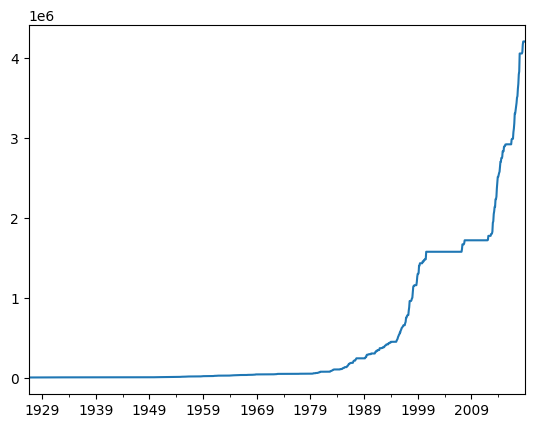

In [7]:
previous_peaks.plot.line()

### Compute drawdown

In [8]:
# `drawdwn` is not a spelling mistake. Later a `drawdown` function will be
# defined. And I don't want to use the same name for two different things.
drawdwn = (wealth_index - previous_peaks) / previous_peaks
drawdwn.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

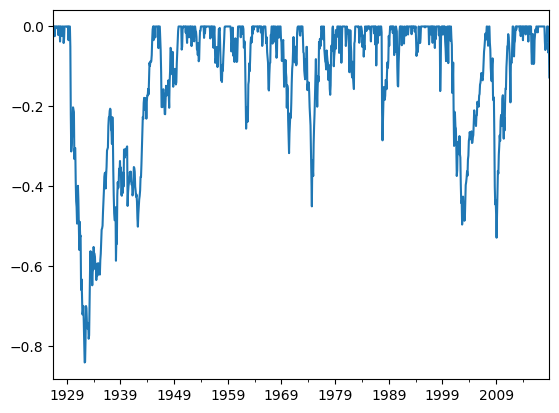

In [9]:
drawdwn.plot()

Notice that the drawdown values are non-positive. Then, to compute the
max drawdown, we actually find the minimum value!

In [10]:
# Max drawdown
drawdwn.min()

np.float64(-0.8400375277943123)

In [11]:
# Max drawdown since 1975
drawdwn["1975":].min()

np.float64(-0.5280945042309304)

In [12]:
# Period corresponding to the max drawdown
drawdwn["1975":].idxmin()

Period('2009-02', 'M')

#### Function for computing drawdowns

In [13]:
def drawdown(return_series: pd.Series) -> pd.DataFrame:
    """
    Takes a time series of asset returns.
    Computes and returns a DataFrame that contains:
    - the wealth index,
    - the previous peaks,
    - percent drawdowns.
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame(
        data={
            "Wealth": wealth_index,
            "Peaks": previous_peaks,
            "Drawdown": drawdowns,
        }
    )

In [14]:
# Testing this function
drawdown_df = drawdown(rets["LargeCap"])
drawdown_df.head()

Wealth        Peaks  Drawdown
1926-07  1032.900000  1032.900000    0.0000
1926-08  1071.117300  1071.117300    0.0000
1926-09  1078.293786  1078.293786    0.0000
1926-10  1052.091247  1078.293786   -0.0243
1926-11  1080.497711  1080.497711    0.0000

In [15]:
drawdown_df["Drawdown"].min()

np.float64(-0.8400375277943123)

<Axes: >

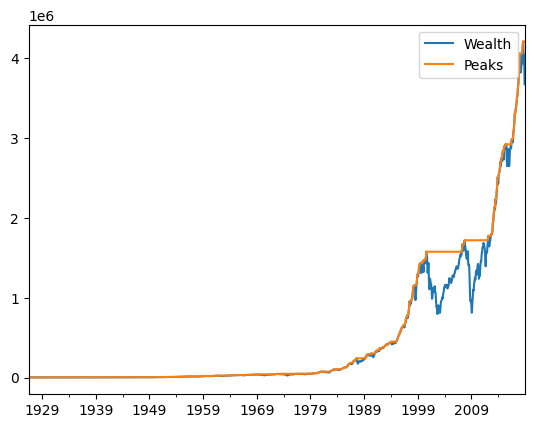

In [16]:
drawdown_df[["Wealth", "Peaks"]].plot()

In [17]:
drawdown(rets["SmallCap"]).loc[:, "Drawdown"].min()

np.float64(-0.8330007793945303)